In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
from scipy.spatial import distance
import seaborn as sns

## Usefull python functions

- [create pairwise distances](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist)
- [convert pairwise distances to distance matrix](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.squareform.html#scipy.spatial.distance.squareform)
- [fill missing values in a dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)
- [calculate weighted averages](https://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html)
- [plot a heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [pd.Series/pd.DataFrame to add column/index to a numpy array](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [7]:
# we use some subset of our rating data for better interpretation
R = pd.read_csv('R.csv', index_col=0)
R

,2001: A Space Odyssey,Ace Ventura: Pet Detective,Austin Powers: The Spy Who Shagged Me,"Big Lebowski, The",Dumb & Dumber,E.T. the Extra-Terrestrial,Four Weddings and a Funeral,Star Wars: Episode I - The Phantom Menace,Titanic
userId,,,,,,,,,
68,1.5,2.5,3.5,0.5,3.5,1.5,1.0,3.0,3.0
608,3.0,3.5,3.0,4.0,3.0,2.5,3.0,4.0,2.0
414,5.0,2.0,4.0,5.0,3.0,4.0,4.0,4.0,4.0
307,3.5,4.0,3.5,4.0,2.5,3.0,3.0,4.0,2.0
599,5.0,2.5,3.5,5.0,3.5,4.0,2.5,3.0,3.0
600,4.0,3.0,2.5,3.5,3.5,2.0,1.0,1.0,3.0
45,4.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0
330,1.5,0.5,3.5,5.0,4.0,4.0,NaN,3.0,3.5
590,5.0,3.0,2.5,4.0,2.0,4.5,NaN,2.5,3.5


In [8]:
R.std()

2001: A Space Odyssey                        1.161619
Ace Ventura: Pet Detective                   1.250714
Austin Powers: The Spy Who Shagged Me        0.728665
Big Lebowski, The                            1.240347
Dumb & Dumber                                0.822920
E.T. the Extra-Terrestrial                   1.082326
Four Weddings and a Funeral                  1.117187
Star Wars: Episode I - The Phantom Menace    1.043118
Titanic                                      0.812843
dtype: float64

## Cosine similarity (and other similarity/distance metrics)

In [11]:
x = np.array([2, 1, 1, 1, 1])
y = np.array([5, 4, 5, 4, 4])

def cosim(x, y):
    #TODO: implement this function, try out other metrics
    num = np.sum(x*y)
    xsum = np.sqrt(np.sum(x ** 2))
    ysum = np.sqrt(np.sum(y ** 2))
    return num/(xsum*ysum)


In [12]:
solution = 1-distance.cosine(x, y)


In [13]:
solution

0.9642857142857143

In [14]:
print(cosim(x, y))

#assert np.round(cosim(x, y), 2) == np.round(solution, 2), "mhh does not seem to work"

0.9642857142857142


In [5]:
# adjusted cosine/ correlation
1-distance.correlation(x, y)

0.6123724356957945

In [6]:
# ouh they are not the same at all!
x = np.array([1, 1])
y = np.array([5, 5])
cosim(x, y)

0.9999999999999998

In [7]:
# example of how to convert euclidian distance to similarity score
1/(1+distance.euclidean(x, y))

0.15022110482233483

In [8]:
# example of jaccard similarity, we need boolean (0, 1) vectors for this!
x = np.array([2, 1, 1, 1, 1])
y = np.array([5, 4, 5, 4, 4])
print(x > 3)
print(y > 3)
1-distance.jaccard(x > 3, y > 3)
# play arround with the threshold (3 in this case)

[False False False False False]
[ True  True  True  True  True]


0.0

## Step 0 - Similarity/ Distance Matrices (from scratch)

In [9]:
# initialize the similarity matrix
UU = np.zeros((len(R), len(R)))
UU

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [10]:
# put some nice columns, index for better readability
UU = pd.DataFrame(UU, index=R.index, columns=R.index)
UU

userId,68,608,414,307,599,600,45,330,590,474,480,19,483,489,380
userId,,,,,,,,,,,,,,,
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
600,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
590,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# fill in missing values with the movie average
R_filled = R.fillna(R.mean())
R_filled.head(2)

,2001: A Space Odyssey,Ace Ventura: Pet Detective,Austin Powers: The Spy Who Shagged Me,"Big Lebowski, The",Dumb & Dumber,E.T. the Extra-Terrestrial,Four Weddings and a Funeral,Star Wars: Episode I - The Phantom Menace,Titanic
userId,,,,,,,,,
68,1.5,2.5,3.5,0.5,3.5,1.5,1.0,3.0,3.0
608,3.0,3.5,3.0,4.0,3.0,2.5,3.0,4.0,2.0


In [118]:
# calculate pairwise similarities
for u in UU.index:
    for v in UU.columns:
        # TODO: 1. step: check number of overlapping elements, only consider vectors above 20 ratings or so
        
        # 2. step: calculate similarities
        UU.loc[u, v] = 1-distance.correlation(R_filled.loc[u], R_filled.loc[v])

In [119]:
UU

userId,68,608,414,307,599,600,45,330,590,474,480,19,483,489,380
userId,,,,,,,,,,,,,,,
68,1.000000,-0.209372,-0.513973,-0.282737,-0.453079,0.002859,-0.260153,-0.124515,-0.694364,-0.124188,-0.091276,-0.497778,-0.593182,-0.764199,-0.357897
608,-0.209372,1.000000,0.022996,0.869164,0.140370,-0.108339,0.064018,-0.051502,-0.209293,-0.257651,-0.614494,-0.358436,0.720328,-0.388112,0.737779
414,-0.513973,0.022996,1.000000,0.052553,0.716735,0.075987,0.089803,0.455878,0.585301,0.782530,0.110930,0.453789,0.173060,0.550041,-0.169481
307,-0.282737,0.869164,0.052553,1.000000,0.205304,-0.085530,-0.117041,-0.294692,0.071236,-0.332759,-0.269593,-0.173221,0.758055,-0.376726,0.733630
599,-0.453079,0.140370,0.716735,0.205304,1.000000,0.600447,0.482382,0.328008,0.664060,0.489805,0.289968,0.125581,0.442995,0.422084,0.348984
600,0.002859,-0.108339,0.075987,-0.085530,0.600447,1.000000,0.269231,-0.078530,0.329333,-0.073847,0.282266,-0.506504,0.255236,0.156250,0.256952
45,-0.260153,0.064018,0.089803,-0.117041,0.482382,0.269231,1.000000,0.669560,0.121728,0.203078,0.221620,0.170152,0.237004,0.312500,0.426965
330,-0.124515,-0.051502,0.455878,-0.294692,0.328008,-0.078530,0.669560,1.000000,-0.078060,0.556065,0.147806,0.342769,-0.014758,0.300411,-0.171726
590,-0.694364,-0.209293,0.585301,0.071236,0.664060,0.329333,0.121728,-0.078060,1.000000,0.377480,0.470606,0.502563,0.203936,0.679066,0.145151


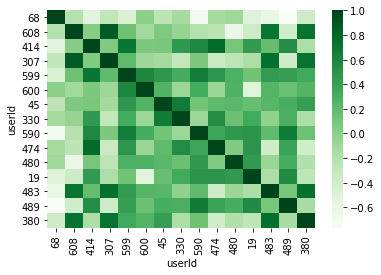

In [121]:
# plot a heatmap
sns.heatmap(UU, cmap='Greens')

In [15]:
# fast way of determining the number of overlapping items
# 1. get a matrix with 1 if user has rated this item
seen_movies = R.notna().astype(int)
seen_movies.head()

,2001: A Space Odyssey,Ace Ventura: Pet Detective,Austin Powers: The Spy Who Shagged Me,"Big Lebowski, The",Dumb & Dumber,E.T. the Extra-Terrestrial,Four Weddings and a Funeral,Star Wars: Episode I - The Phantom Menace,Titanic
userId,,,,,,,,,
68,1,1,1,1,1,1,1,1,1
608,1,1,1,1,1,1,1,1,1
414,1,1,1,1,1,1,1,1,1
307,1,1,1,1,1,1,1,1,1
599,1,1,1,1,1,1,1,1,1


In [16]:
# calculate number of overlapping movies
seen_movies.dot(seen_movies.T)
# u can use this to filter out similarity scores that are unreliable

userId,68,608,414,307,599,600,45,330,590,474,480,19,483,489,380
userId,,,,,,,,,,,,,,,
68,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8
608,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8
414,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8
307,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8
599,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8
600,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8
45,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8
330,8,8,8,8,8,8,8,8,8,7,7,7,7,7,8
590,8,8,8,8,8,8,8,8,8,7,7,7,7,7,8


## Step I - Similarity/ Distance Matrices


calculate a user-user distance matrix using one of the distance matrix that [scipy offers](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist)

- choose a value to fill in the missings (e.g. item-averages or user-averages)
- first use the funtion `pdist` to calculate pairwise distances and then use the function `squareform` to convert the list into a symmetric distance matrix

## Step II -  Neighborhood

use the distance matrix to find the **5 most similar users for user with id 608**

- similarities and distances are the same thing. the larger the distance the less similar two objects are.

- convert the distance matrix into a pandas dataframe
- select the row for the active user
- apply the `sort_values()` function
- post the distance metric and your ranking of user ids in slack

In [6]:
active_user = 608
# find similarities for active_user and sort it, take 1 to 5 entries 
# entry at 0 contains the similrity with itself
neighbors = UU.loc[active_user].sort_values(ascending=False)[1:6]
neighbors

NameError: name 'UU' is not defined

In [125]:
R.loc[neighbors.index]

,2001: A Space Odyssey,Ace Ventura: Pet Detective,Austin Powers: The Spy Who Shagged Me,"Big Lebowski, The",Dumb & Dumber,E.T. the Extra-Terrestrial,Four Weddings and a Funeral,Star Wars: Episode I - The Phantom Menace,Titanic
userId,,,,,,,,,
307,3.5,4.0,3.5,4.0,2.5,3.0,3.0,4.0,2.0
380,4.0,5.0,3.0,5.0,4.0,4.0,NaN,4.0,2.0
483,NaN,4.0,3.5,5.0,3.0,3.0,3.5,3.0,2.0
599,5.0,2.5,3.5,5.0,3.5,4.0,2.5,3.0,3.0
45,4.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,4.0


## Cosine distance

## Euclidean distance

## Pearson distance

## Jaccard Distance

Hint: convert your ratings to a boolean matrix first (e.g. by only looking at ratings above a certain treshold)